In [1]:
import pandas as pd
import numpy as np 
import itertools as it
% matplotlib inline
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [2]:
import pickle
import time

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

## Loading the data

In [8]:
model = KeyedVectors.load_word2vec_format('./Goog/GoogleNews-vectors-negative300.bin', binary=True)

In [33]:
clean_final = pd.read_csv("./total_news/clean_final_news.csv", encoding = "utf8", index_col = 0)

In [34]:
clean_final.head()

,author,published,text,domain_rank,site_url,spam_score,title,response,length
0,SAM TANENHAUS,2016-11-20T03:51:00.000+02:00,Privacy Policy Eisenhowers two terms bore this...,98.0,nytimes.com,0.000,Opinion: Donald Trump’s Art of the New Deal?,Not fake,949
1,NaN,2016-11-20T00:52:00.000+02:00,Can Trump Save Their Jobs? by Nelson D. Sc...,98.0,nytimes.com,0.000,Carrier Workers for Trump,Not fake,372
2,Kathleen Elkins,2016-11-20T06:18:00.000+02:00,"Tuesday, 18 Oct 2016 | 10:25 AM ET CNBC.com Ed...",767.0,cnbc.com,0.008,Tennis star Caroline Wozniacki shares the mone...,Not fake,386
3,JEFF SOMMER,2016-11-20T00:04:00.000+02:00,Continue reading the main story Yet it is poss...,98.0,nytimes.com,0.000,Strategies: It’s Not Just the White House. Cha...,Not fake,1005
4,James Rufus Koren,2016-11-20T02:42:00.000+02:00,Wells Fargo hit with new sanctions following f...,609.0,latimes.com,0.264,Wells Fargo hit with new sanctions following f...,Not fake,809


In [12]:
fileObject = open('./lem_texts/uni_text.sav','rb')  
uni_lem_comb2 = pickle.load(fileObject)  ## load unigram

In [7]:
fileObject = open('./lem_texts/bi_text.sav','rb')  
bi_lem_comb2 = pickle.load(fileObject)  ## load bigram

In [9]:
fileObject = open('./lem_texts/tri_text.sav','rb')  
tri_lem_comb2 = pickle.load(fileObject)  ## load trigram

In [13]:
uni_lem = pd.Series([x for x in uni_lem_comb2])
uni_lem[0:10]

0    privacy policy eisenhowers term bear instead u...
1    trump save jobs nelson d. schwartz nov. look w...
2    tuesday oct 10:25 et cnbc.com eduardo munoz al...
3    continue read main story possible election rem...
4    wells fargo hit new sanction follow fake accou...
5    privacy policy liberal society depend illibera...
6    let friend social network know read facebook e...
7    privacy policy lot people tonight feel like lo...
8    young barber brazil cutting away traditional b...
9    passenger train go track near northern indian ...
dtype: object

In [8]:
bi_lem = pd.Series([x for x in bi_lem_comb2])
bi_lem[0:10]

0    privacy_policy eisenhowers term bear instead u...
1    trump save jobs nelson d. schwartz nov. look w...
2    tuesday oct 10:25 et cnbc.com eduardo_munoz al...
3    continue_read main_story possible election rem...
4    wells_fargo hit new sanction follow fake_accou...
5    privacy_policy liberal society depend illibera...
6    let_friend social_network know read_facebook e...
7    privacy_policy lot people tonight feel_like lo...
8    young barber brazil cutting away traditional b...
9    passenger_train go track near northern indian ...
dtype: object

In [10]:
tri_lem = pd.Series([x for x in tri_lem_comb2])
tri_lem[0:10]

0    privacy_policy eisenhowers term bear instead u...
1    trump save jobs nelson d. schwartz nov. look w...
2    tuesday oct 10:25 et cnbc.com eduardo_munoz_al...
3    continue_read_main_story possible election rem...
4    wells_fargo hit new sanction follow fake_accou...
5    privacy_policy liberal society depend illibera...
6    let_friend_social_network know_read_facebook e...
7    privacy_policy lot_people tonight feel_like lo...
8    young barber brazil cutting away traditional b...
9    passenger_train go track near northern indian ...
dtype: object

## Converting the text into vectors

In [11]:
def infer_vector(text):
    text = text.split()
    vector = []
    for i in text:
        try:
            vector.append(model.word_vec(i))
        except:
            pass
    return list(np.mean(vector, axis=0))

test = clean_final.iloc[:10, :]
test.text = test.text.apply(infer_vector)
test.head()

/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,author,published,text,domain_rank,site_url,spam_score,title,response,length,binary_response
0,SAM TANENHAUS,2016-11-20T03:51:00.000+02:00,"[0.0410616, 0.0443374, 0.0329776, 0.0611348, -...",98.0,nytimes.com,0.000,Opinion: Donald Trump’s Art of the New Deal?,Not fake,949,0
1,NaN,2016-11-20T00:52:00.000+02:00,"[0.0345326, 0.0364513, 0.0196588, 0.0763706, -...",98.0,nytimes.com,0.000,Carrier Workers for Trump,Not fake,372,0
2,Kathleen Elkins,2016-11-20T06:18:00.000+02:00,"[0.0474658, 0.00713334, 0.0312889, 0.0871276, ...",767.0,cnbc.com,0.008,Tennis star Caroline Wozniacki shares the mone...,Not fake,386,0
3,JEFF SOMMER,2016-11-20T00:04:00.000+02:00,"[0.0167984, 0.0344597, 0.0157176, 0.0664391, -...",98.0,nytimes.com,0.000,Strategies: It’s Not Just the White House. Cha...,Not fake,1005,0
4,James Rufus Koren,2016-11-20T02:42:00.000+02:00,"[-0.000221085, 0.0416317, 0.03043, 0.0444352, ...",609.0,latimes.com,0.264,Wells Fargo hit with new sanctions following f...,Not fake,809,0


In [12]:
%%time
vec_text = tri_lem.apply(infer_vector)
type(vec_text)

CPU times: user 22.8 s, sys: 994 ms, total: 23.8 s
Wall time: 23.9 s


In [13]:
vec_text[0:2]

0    [0.0335845, 0.0401085, 0.00729215, 0.112954, -...
1    [0.0324782, 0.00438509, -0.00248873, 0.1, -0.0...
dtype: object

In [14]:
%%time
vec_text = pd.DataFrame(list(map(lambda x: list(x), vec_text)))

CPU times: user 3.13 s, sys: 159 ms, total: 3.29 s
Wall time: 3.32 s


In [15]:
vec_text.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.033585,0.040108,0.007292,0.112954,-0.060914,-0.029191,0.048299,-0.058155,0.084398,0.059573,...,-0.068472,0.014620,-0.037333,-0.016348,-0.042939,-0.021002,0.017126,-0.048978,0.026031,-0.012229
1,0.032478,0.004385,-0.002489,0.100000,-0.071105,0.017676,0.060257,-0.050939,0.085788,0.046210,...,-0.041618,0.035648,-0.075665,0.011646,-0.007537,-0.012843,0.009767,-0.057980,0.025834,-0.028797
2,0.025310,0.012568,-0.010649,0.128698,-0.019919,0.007436,0.079936,-0.088572,0.069966,0.069574,...,-0.024976,0.074644,-0.064599,-0.001808,-0.013263,-0.095344,0.019082,-0.031374,0.001696,-0.029502
3,0.014668,0.020092,-0.030602,0.084360,-0.075278,-0.041485,0.052998,-0.080511,0.135734,0.066690,...,-0.075238,0.038700,-0.017733,-0.010239,-0.012920,-0.022788,-0.006968,0.010951,0.034321,-0.001688
4,-0.042439,-0.012939,0.006611,0.042099,-0.026948,-0.040657,0.047994,-0.022462,0.121271,0.019877,...,-0.023605,0.059983,-0.021047,0.013978,-0.017887,-0.008069,-0.001654,-0.020538,0.010296,-0.045819


In [16]:
# saving vec_text of trigrams:
filename = 'vec_text_trigram.sav'
pickle.dump(vec_text, open(filename, 'wb'))

## Prepping for Model runs

In [14]:
clean_final["binary_response"] = np.where(clean_final["response"] == "Not fake", 0, 1)

In [15]:
y_response = clean_final.binary_response.values

In [23]:
def evaluate_model(clf, actual, predicted):
    report = metrics.classification_report(actual, predicted, target_names = ["0", "1"])
    matrix = confusion_matrix(actual, predicted)
    train_loss = metrics.log_loss(y_train, clf.predict_proba(x_train))
    test_loss = metrics.log_loss(y_test, clf.predict_proba(x_test))
    
    print("Train score:", train_loss)
    print("Test score:", test_loss)
    print("Confusion Matrix\n", matrix)
    print("Classification Report:\n", report)
    
    return test_loss

In [80]:
x_train, x_test, y_train, y_test = train_test_split(vec_text, y_response, test_size = 0.2, stratify = y_response)

In [81]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
20597,0.007709,0.017403,-0.038444,0.099468,-0.053557,-0.028407,0.098579,-0.068028,0.151267,0.091760,...,0.011691,0.084913,-0.067285,-0.010680,-0.004272,-0.030108,0.013905,-0.008894,0.054871,-0.001743
33737,0.017816,-0.017890,-0.024544,0.079752,-0.079946,0.024167,0.079945,-0.041951,0.104204,0.041188,...,0.010981,0.017813,-0.065238,0.046668,-0.036378,-0.072763,-0.020446,-0.090308,-0.003251,0.019481
8714,-0.019424,0.027737,-0.027773,0.101947,-0.050705,-0.025107,0.049221,-0.079895,0.135338,0.076715,...,-0.047518,0.076821,-0.057666,-0.006992,-0.010111,-0.013085,0.002304,0.006605,0.014867,-0.036863
26303,-0.018105,-0.013560,0.017270,0.116076,-0.078645,0.026974,0.062000,-0.109196,0.085268,0.069428,...,-0.025339,0.054621,-0.011983,0.065452,-0.004409,-0.009881,-0.075745,-0.058842,-0.021266,0.021686
30951,0.044345,0.023070,-0.024319,0.106851,-0.049098,0.003009,0.091687,-0.062067,0.117500,0.029144,...,-0.082412,0.054102,-0.087407,0.002709,-0.043134,0.009037,-0.014926,-0.007236,0.034299,-0.031974


In [ ]:
# mean_w2v = MeanEmbeddingVectorizer(w2v).fit(x_train, y_train)

In [ ]:
# m = mean_w2v.transform(x_train)

In [ ]:
# m.shape

## Loading in Previously Saved models:

In [5]:
# load the models
fileObject = open('./models/wv_lr_model.sav','rb')  
wv_lr = pickle.load(fileObject)

fileObject = open('./models/wv_svm_model.sav','rb')  
wv_svm = pickle.load(fileObject)

fileObject = open('./models/wv_rf_model.sav','rb')  
wv_rf = pickle.load(fileObject)

In [6]:
# load training/test data:
clean_final = pd.read_csv("./total_news/clean_final_news.csv", encoding = "utf8", index_col = 0)
clean_final["binary_response"] = np.where(clean_final["response"] == "Not fake", 0, 1)
y_response = clean_final.binary_response.values

In [17]:
# load vec_text
fileObject = open('./lem_texts/vec_text_trigram.sav','rb')  
vec_text = pickle.load(fileObject)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(vec_text, y_response, test_size = 0.2, stratify = y_response)

In [19]:
def evaluate_model(clf, actual, predicted):
    report = metrics.classification_report(actual, predicted, target_names = ["0", "1"])
    matrix = confusion_matrix(actual, predicted)
    train_loss = metrics.log_loss(y_train, clf.predict_proba(x_train))
    test_loss = metrics.log_loss(y_test, clf.predict_proba(x_test))
    
    print("Train score:", train_loss)
    print("Test score:", test_loss)
    print("Confusion Matrix\n", matrix)
    print("Classification Report:\n", report)

## Logistic Regression - Trigrams

In [4]:
lr = LogisticRegression()

In [26]:
%%time
lr.fit(x_train, y_train)

CPU times: user 1.64 s, sys: 59.5 ms, total: 1.7 s
Wall time: 1.71 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
lr_parameters = {#'tfidf__max_df': (0.75, 0.80, 0.85, 0.90, 0.95, 1.0),\
              #'tfidf__min_df': (0.001,0.01,0.1),\
               'penalty': ('l1','l2'),\
               'C': (0.01, 0.1, 1),\
               'class_weight': (None, 'balanced')}

In [28]:
# Establish grid search instance
wv_lr = GridSearchCV(lr, lr_parameters, n_jobs=-1, scoring = 'f1')

In [29]:
%%time
wv_lr = wv_lr.fit(x_train, y_train)

/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


CPU times: user 2min 23s, sys: 706 ms, total: 2min 24s
Wall time: 4min 43s


In [30]:
wv_lr.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l1'}

In [20]:
lr_predicted = wv_lr.predict(x_test)

In [21]:
%%time
# Get more detailed performance metrics
evaluate_model(wv_lr, y_test, lr_predicted)

Train score: 0.377574622483
Test score: 0.378936908813
Confusion Matrix
 [[3940  775]
 [ 372 1836]]
Classification Report:
              precision    recall  f1-score   support

          0       0.91      0.84      0.87      4715
          1       0.70      0.83      0.76      2208

avg / total       0.85      0.83      0.84      6923

CPU times: user 34 ms, sys: 2.71 ms, total: 36.7 ms
Wall time: 29.2 ms


In [22]:
train_loss = metrics.roc_auc_score(y_train, wv_lr.predict(x_train))
test_loss = metrics.roc_auc_score(y_test, wv_lr.predict(x_test))
print("Train score:", train_loss)
print("Test score:", test_loss)

Train score: 0.835581012925
Test score: 0.833576352068


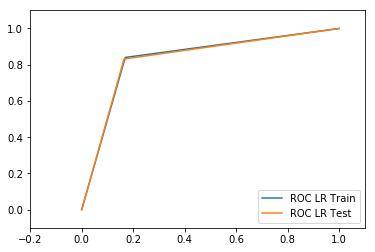

In [23]:
import sklearn
A=sklearn.metrics.roc_curve(y_train,wv_lr.predict(x_train),pos_label=1)
B=sklearn.metrics.roc_curve(y_test,wv_lr.predict(x_test),pos_label=1)

plt.plot(A[0],A[1],label='ROC LR Train')
plt.plot(B[0],B[1],label='ROC LR Test')
plt.xlim((-0.2,1.1))
plt.ylim((-0.1,1.1))
plt.legend(loc=4)

In [54]:
# saving lr model
filename = 'wv_lr_model.sav'
pickle.dump(wv_lr, open(filename, 'wb'))

## SVM - Trigrams

In [36]:
from sklearn.svm import SVC
svm = SVC()

In [37]:
%%time
svm.fit(x_train, y_train)

CPU times: user 3min 4s, sys: 991 ms, total: 3min 5s
Wall time: 3min 6s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
svm_parameters = {'C': (1, 10, 100, 1000),\
                 'degree': (1, 2, 3),\
                 'class_weight': (None, 'balanced')}

In [45]:
wv_svm = GridSearchCV(svm, svm_parameters, n_jobs=-1, scoring='f1')

In [46]:
%%time
wv_svm = wv_svm.fit(x_train, y_train)

/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/m

CPU times: user 3min 1s, sys: 2.1 s, total: 3min 3s
Wall time: 1h 9min 18s


In [47]:
wv_svm.best_params_

{'C': 1000, 'class_weight': 'balanced', 'degree': 1}

In [24]:
svm_predicted = wv_svm.predict(x_test)

In [25]:
# can't feed in proba for svm, log loss requires probability
matrix = confusion_matrix(y_test, svm_predicted)
report = metrics.classification_report(y_test, svm_predicted, target_names = ['0', '1'])
print('Confusion Matrix:\n', matrix)
print('Classification report:\n', report)

Confusion Matrix:
 [[3975  740]
 [ 354 1854]]
Classification report:
              precision    recall  f1-score   support

          0       0.92      0.84      0.88      4715
          1       0.71      0.84      0.77      2208

avg / total       0.85      0.84      0.84      6923



In [26]:
train_loss = metrics.roc_auc_score(y_train, wv_svm.predict(x_train))
test_loss = metrics.roc_auc_score(y_test, wv_svm.predict(x_test))
print("Train score:", train_loss)
print("Test score:", test_loss)

Train score: 0.842183517682
Test score: 0.841363997879


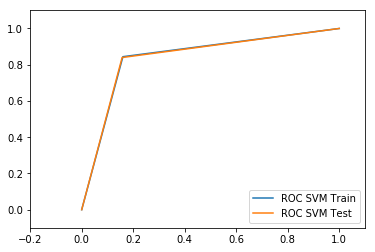

In [27]:
A=sklearn.metrics.roc_curve(y_train,wv_svm.predict(x_train),pos_label=1)
B=sklearn.metrics.roc_curve(y_test,wv_svm.predict(x_test),pos_label=1)

plt.plot(A[0],A[1],label='ROC SVM Train')
plt.plot(B[0],B[1],label='ROC SVM Test')
plt.xlim((-0.2,1.1))
plt.ylim((-0.1,1.1))
plt.legend(loc=4)

In [53]:
# saving svm model
filename = 'wv_svm_model.sav'
pickle.dump(wv_svm, open(filename, 'wb'))

## Random Forest - Trigrams

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [56]:
%%time
rf.fit(x_train, y_train)

CPU times: user 4.83 s, sys: 39.9 ms, total: 4.87 s
Wall time: 4.9 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [57]:
rf_parameters = {'n_estimators': (50, 100, 200),\
               'criterion': ('gini', 'entropy'),\
               'class_weight': (None, 'balanced'),\
               'min_samples_split': (10,20,30)}

In [58]:
wv_rf = GridSearchCV(rf, rf_parameters, n_jobs=-1, scoring='f1')

In [59]:
%%time
wv_rf = wv_rf.fit(x_train, y_train)

CPU times: user 2min 12s, sys: 3.18 s, total: 2min 15s
Wall time: 16min 57s


In [60]:
wv_rf.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'min_samples_split': 30,
 'n_estimators': 200}

In [28]:
%%time
rf_predicted = wv_rf.predict(x_test)

CPU times: user 375 ms, sys: 38.3 ms, total: 413 ms
Wall time: 416 ms


In [29]:
%%time
# Get more detailed performance metrics
evaluate_model(wv_rf, y_test, rf_predicted)

Train score: 0.28363707143
Test score: 0.286755986467
Confusion Matrix
 [[4556  159]
 [ 190 2018]]
Classification Report:
              precision    recall  f1-score   support

          0       0.96      0.97      0.96      4715
          1       0.93      0.91      0.92      2208

avg / total       0.95      0.95      0.95      6923

CPU times: user 1.89 s, sys: 78.6 ms, total: 1.97 s
Wall time: 1.98 s


In [30]:
%%time
train_loss = metrics.roc_auc_score(y_train, wv_rf.predict(x_train))
test_loss = metrics.roc_auc_score(y_test, wv_rf.predict(x_test))
print("Train score:", train_loss)
print("Test score:", test_loss)

Train score: 0.9471313719
Test score: 0.940113556027
CPU times: user 1.89 s, sys: 58.7 ms, total: 1.95 s
Wall time: 1.95 s


CPU times: user 1.98 s, sys: 58.6 ms, total: 2.04 s
Wall time: 2.04 s


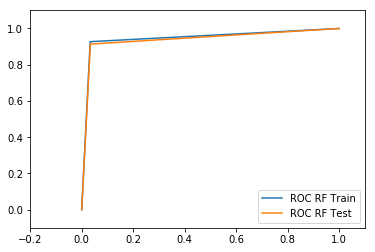

In [31]:
%%time
A=sklearn.metrics.roc_curve(y_train,wv_rf.predict(x_train),pos_label=1)
B=sklearn.metrics.roc_curve(y_test,wv_rf.predict(x_test),pos_label=1)

plt.plot(A[0],A[1],label='ROC RF Train')
plt.plot(B[0],B[1],label='ROC RF Test')
plt.xlim((-0.2,1.1))
plt.ylim((-0.1,1.1))
plt.legend(loc=4)

In [65]:
# saving svm model
filename = 'wv_rf_model.sav'
pickle.dump(wv_rf, open(filename, 'wb'))

## Logistic Regression - Bigrams

In [10]:
%%time
vec_text_bi = bi_lem.apply(infer_vector)
type(vec_text_bi)

CPU times: user 21.2 s, sys: 331 ms, total: 21.5 s
Wall time: 21.6 s


In [11]:
%%time
vec_text_bi = pd.DataFrame(list(map(lambda x: list(x), vec_text_bi)))

CPU times: user 2.94 s, sys: 182 ms, total: 3.12 s
Wall time: 3.12 s


In [12]:
vec_text_bi.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.032914,0.041971,0.010249,0.112589,-0.060370,-0.033499,0.048079,-0.056296,0.081851,0.054917,...,-0.061651,0.011835,-0.043411,-0.016750,-0.044377,-0.018817,0.014995,-0.046308,0.027923,-0.014004
1,0.025956,0.002461,-0.003110,0.102935,-0.073104,0.015920,0.065457,-0.048688,0.087145,0.051192,...,-0.033402,0.035703,-0.072315,0.012243,-0.001642,-0.017677,0.009899,-0.059558,0.029522,-0.026119
2,0.027883,0.015250,-0.010191,0.129361,-0.018491,0.006342,0.079601,-0.090290,0.071359,0.070335,...,-0.028281,0.070759,-0.065828,-0.004968,-0.014056,-0.095150,0.017775,-0.032080,0.001624,-0.028968
3,0.013175,0.018189,-0.034123,0.089051,-0.066914,-0.048653,0.055105,-0.078310,0.141677,0.066115,...,-0.070120,0.036414,-0.023299,-0.012192,-0.011044,-0.028370,-0.007311,0.010829,0.032877,-0.005561
4,-0.033727,0.004050,-0.012132,0.049739,-0.021497,-0.052307,0.035218,-0.027092,0.114728,0.018676,...,-0.002633,0.064286,-0.020233,0.021477,-0.008193,-0.025942,-0.015454,-0.051123,-0.006340,-0.031178


In [13]:
clean_final["binary_response"] = np.where(clean_final["response"] == "Not fake", 0, 1)

In [14]:
y_response = clean_final.binary_response.values

In [15]:
x_train, x_test, y_train, y_test = train_test_split(vec_text_bi, y_response, test_size = 0.2, stratify = y_response)

In [16]:
%%time
lr = LogisticRegression()
lr.fit(x_train, y_train)

CPU times: user 1.54 s, sys: 58.1 ms, total: 1.6 s
Wall time: 1.61 s


In [17]:
lr_parameters = {#'tfidf__max_df': (0.75, 0.80, 0.85, 0.90, 0.95, 1.0),\
              #'tfidf__min_df': (0.001,0.01,0.1),\
               'penalty': ('l1','l2'),\
               'C': (0.01, 0.1, 1),\
               'class_weight': (None, 'balanced')}

In [18]:
# Establish grid search instance
wv_lr_bi = GridSearchCV(lr, lr_parameters, n_jobs=-1, scoring = 'f1')

In [19]:
%%time
wv_lr_bi = wv_lr_bi.fit(x_train, y_train)

/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


CPU times: user 2min 8s, sys: 460 ms, total: 2min 9s
Wall time: 4min 17s


In [20]:
wv_lr_bi.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l1'}

In [21]:
lr_predicted_bi = wv_lr_bi.predict(x_test)

In [24]:
%%time
# Get more detailed performance metrics
evaluate_model(wv_lr_bi, y_test, lr_predicted_bi)

Train score: 0.362014656181
Test score: 0.380065353748
Confusion Matrix
 [[3929  786]
 [ 341 1867]]
Classification Report:
              precision    recall  f1-score   support

          0       0.92      0.83      0.87      4715
          1       0.70      0.85      0.77      2208

avg / total       0.85      0.84      0.84      6923

CPU times: user 32.3 ms, sys: 3.11 ms, total: 35.4 ms
Wall time: 28.6 ms


0.38006535374840977

In [25]:
train_loss = metrics.roc_auc_score(y_train, wv_lr_bi.predict(x_train))
test_loss = metrics.roc_auc_score(y_test, wv_lr_bi.predict(x_test))
print("Train score:", train_loss)
print("Test score:", test_loss)

Train score: 0.842743131775
Test score: 0.839429789678


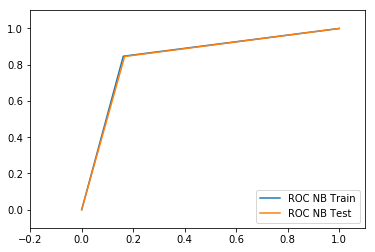

In [26]:
import sklearn
A=sklearn.metrics.roc_curve(y_train,wv_lr_bi.predict(x_train),pos_label=1)
B=sklearn.metrics.roc_curve(y_test,wv_lr_bi.predict(x_test),pos_label=1)

plt.plot(A[0],A[1],label='ROC LR Train')
plt.plot(B[0],B[1],label='ROC LR Test')
plt.xlim((-0.2,1.1))
plt.ylim((-0.1,1.1))
plt.legend(loc=4)

In [27]:
# saving lr model
filename = 'wv_lr_bi_model.sav'
pickle.dump(wv_lr_bi, open(filename, 'wb'))